In [1]:
# importing Libraries

from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
import pandas as pd
data = pd.read_csv("bankloan.csv")
data.isna().any() # determines if any column has NaA values
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data = data.dropna() # function is used to remove missing values
data.isna().any()
# data = data.drop("Loan_ID", axis = 1)
data["LoanAmount"] = (data["LoanAmount"]*100).astype(int)
Counter(data["Loan_Status"])

Counter({'N': 148, 'Y': 332})

In [4]:
pre_y = data["Loan_Status"]
pre_X = data.drop("Loan_Status", axis = 1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map({"Y":1, "N":0})
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,12800,360.0,1.0,1,0,0,0,...,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,6600,360.0,1.0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,12000,360.0,1.0,0,0,1,0,...,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,14100,360.0,1.0,0,0,0,1,...,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,26700,360.0,1.0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,7100,360.0,1.0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,4000,180.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,25300,360.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,18700,360.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1


In [5]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)
Counter(y)

Counter({0: 332, 1: 332})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
classifier = Sequential()
classifier.add(Dense(200, activation="relu", kernel_initializer="random_normal", input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation="relu", kernel_initializer="random_normal"))
classifier.add(Dense(4, activation="relu", kernel_initializer="random_normal"))
classifier.add(Dense(1, activation="sigmoid", kernel_initializer="random_normal"))
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 265us/step


[0.15468611235672472, 0.9887005686759949]

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred = pd.DataFrame(y_pred, columns={"Loan Status"})
# y_pred = y_pred.replace({False:"Rejected", True:"Approved"})
y_pred

,Loan Status
0,False
1,False
2,False
3,False
4,False
...,...
128,False
129,False
130,False
131,False


Text(0.5, 1, 'Confusion Matrix')

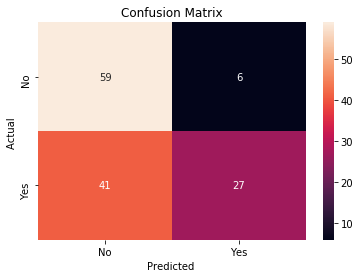

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, ax=ax)

ax.set_xlabel("Predicted ")
ax.set_ylabel("Actual ")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"])

ax.set_title("Confusion Matrix")

In [10]:
import pickle
from sklearn.externals import joblib
filename = "loan_model.pkl"
joblib.dump(classifier, filename)

['loan_model.pkl']

In [11]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_score = []
for train, test in kfold.split(X, y):
    # Create Model
    classifier.add(Dense(200, input_dim=17, activation="relu",))
    classifier.add(Dense(400, activation="relu",))
    classifier.add(Dense(4, activation="relu",))
    classifier.add(Dense(1, activation="relu",))
    
    # Compile Model
    classifier.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    # Fit Model
    classifier.fit(X[train], y[train], epochs=100, verbose=0 )
    
    # Evaluate Model
    scores = classifier.evaluate(X[test], y[test], verbose=0)
    print(classifier.metrics_names[1], scores[1]*100)
         

accuracy 93.37349534034729
accuracy 50.0
accuracy 50.0
accuracy 50.0
